<a href="https://colab.research.google.com/github/HalyshAnton/IT-Step-Pyton-AI/blob/main/module2/%D0%94%D0%97_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/ship_passengers.csv",
                 index_col="Unnamed: 0")
display(df)

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


# Завдання
Проведіть аналіз даних пасажирів. Включіть

* аналіз числових ознак
* аналіз категоріальних ознак
* перевірку викидів

В результаті як коментар опишіть дані(що на що впливає\не впливає і як, можливо якихось даних надто мало і потрібно більше даних, тощо)

In [118]:
datadict = pd.DataFrame(df.dtypes)
datadict.rename(columns={0:'dtype'}, inplace=True)

In [119]:
datadict['nunique'] = df.nunique()
datadict['missing values'] = df.isnull().sum()
datadict['count'] = df.count()
display(datadict)

,dtype,nunique,missing values,count
pclass,int64,3,0,891
sex,object,2,0,891
age,float64,88,177,714
sibsp,int64,7,0,891
parch,int64,7,0,891
fare,float64,248,0,891
embarked,object,3,2,889


In [120]:
df.describe(include=['object'])


,sex,embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


In [121]:
df.describe(include=['number'])

,pclass,age,sibsp,parch,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


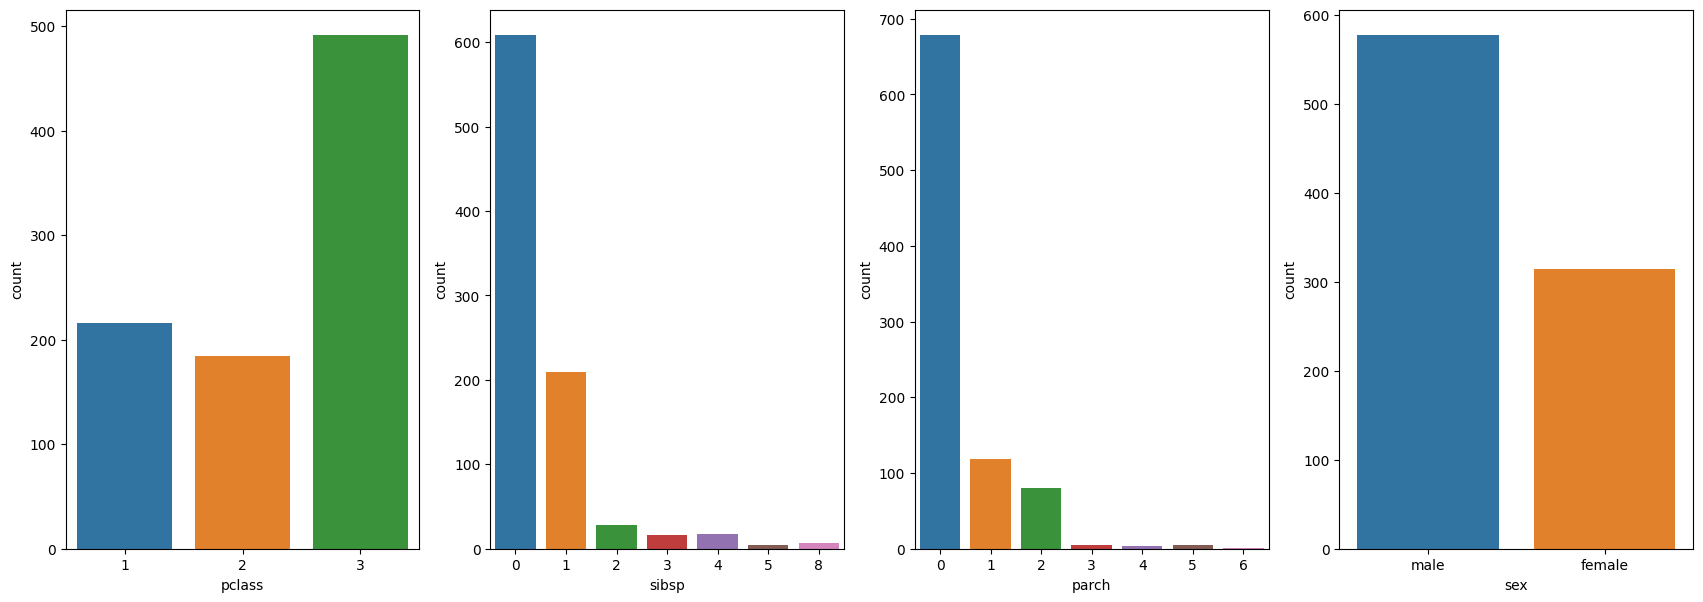

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


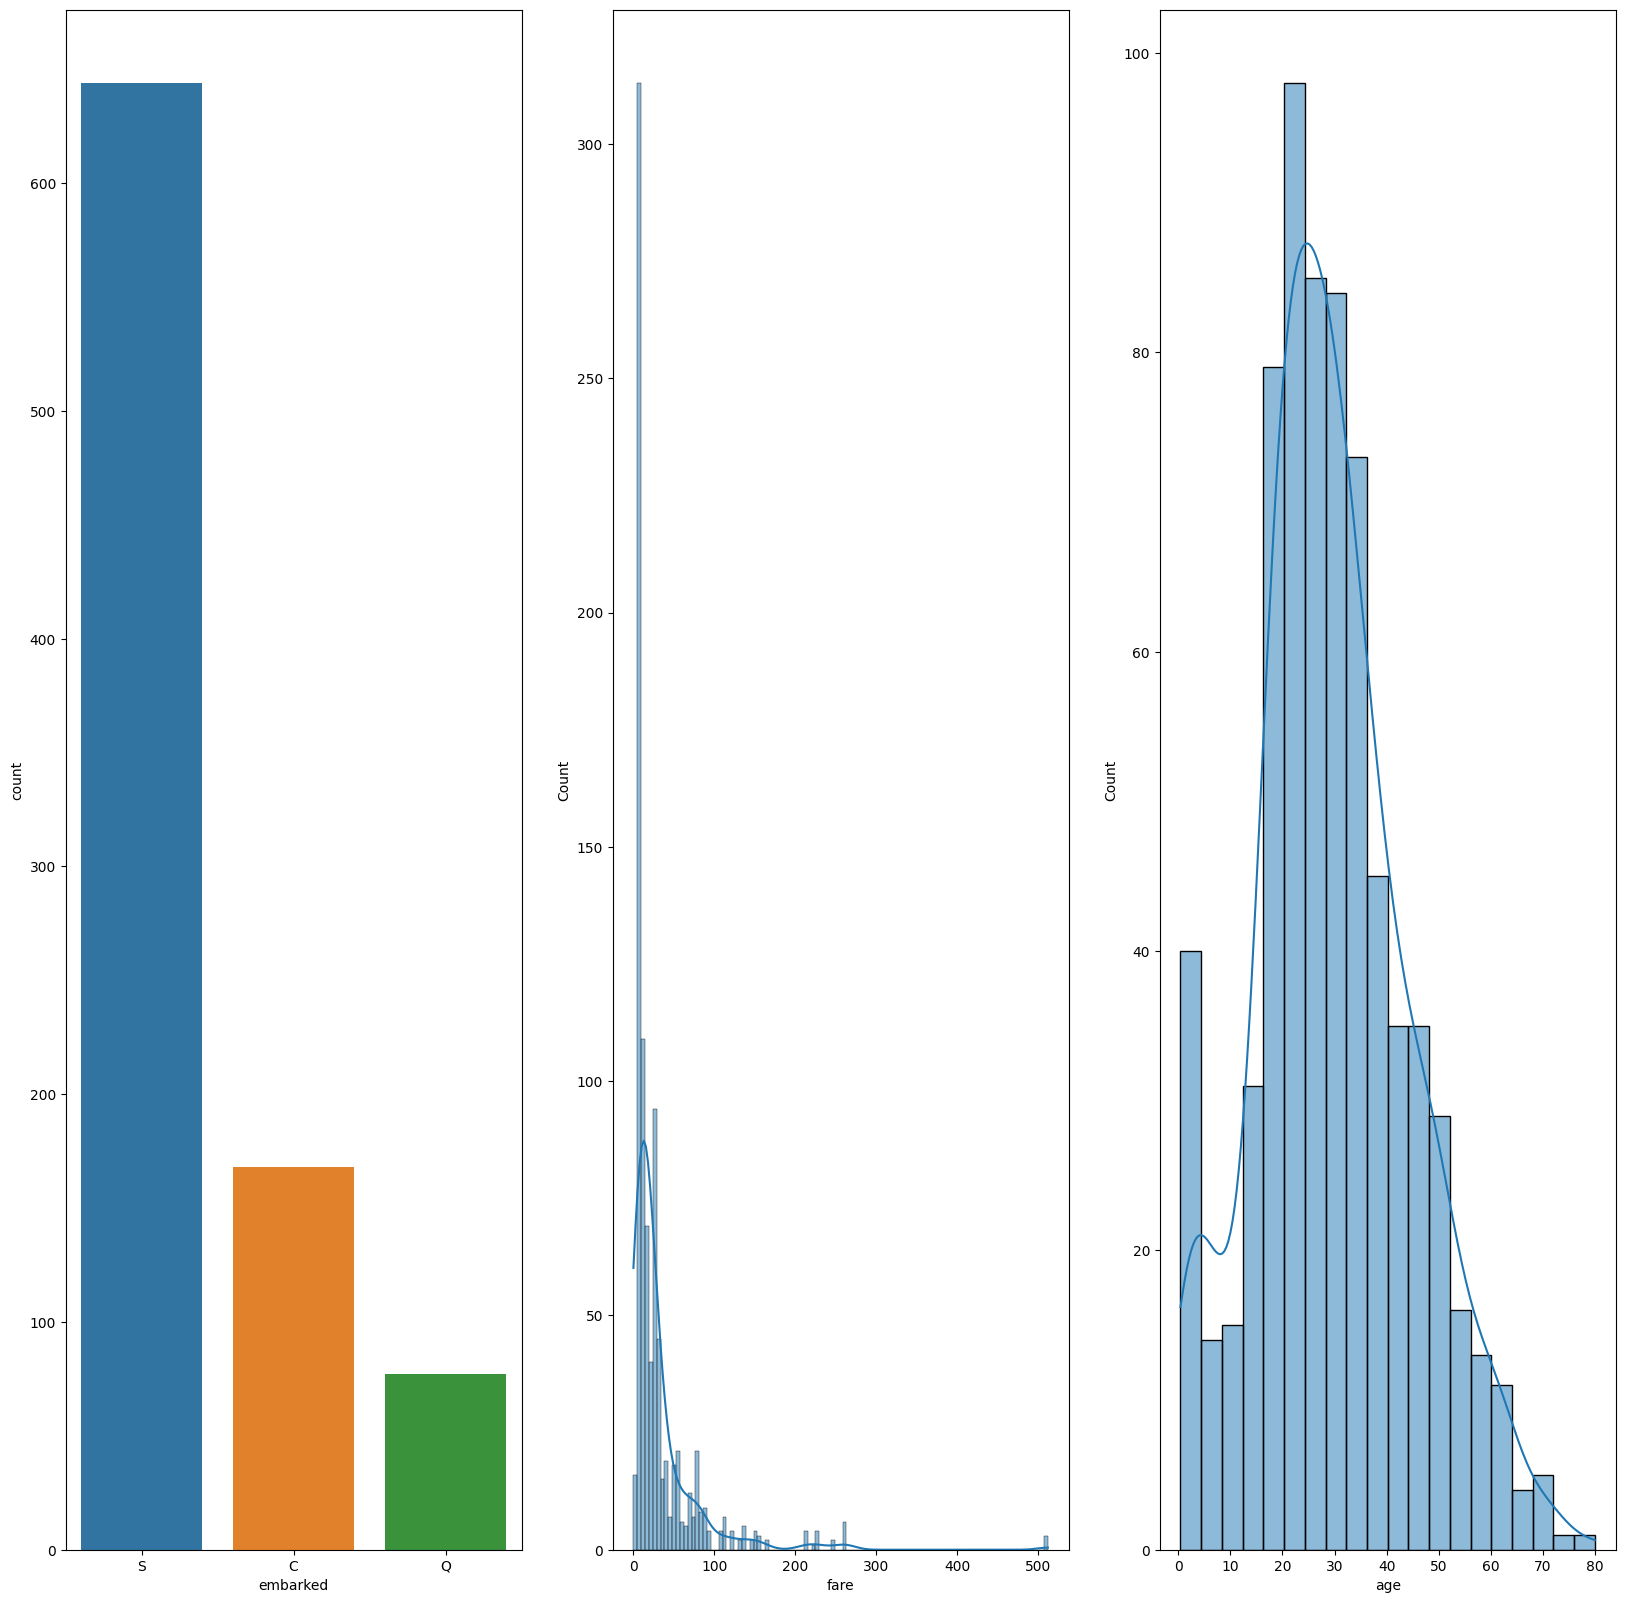

In [122]:
fix, ax = plt.subplots(1,4, figsize=(21,7))
# sns.countplot('pclass', data=df, ax=ax[0,0])
sns.countplot(x='pclass',data=df,ax=ax[0])
sns.countplot(x='sibsp',data=df,ax=ax[1])
sns.countplot(x='parch',data=df,ax=ax[2])
sns.countplot(x='sex', data=df, ax=ax[3])

plt.show()

fix, ax = plt.subplots(1,3, figsize=(20,20))
sns.countplot(x='embarked', data=df, ax=ax[0])
sns.histplot(df['fare'],kde=True,ax=ax[1])
sns.histplot(df['age'],kde=True,ax=ax[2])
plt.show()


In [123]:
display(df.head())

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [124]:
# do one hot encoding for sex and embarked to build correlation matrix
sex_mapping = {'male': 0, 'female': 1}
print('sex mapping:', sex_mapping)

df['embarked'] = df['embarked'].astype(str)
embarked_values = df['embarked'].unique()
# print(embarked_values)
embarked_mapping = {value:index for index,value in enumerate(embarked_values)}
print('embarked_mapping:',embarked_mapping)

df['sex'] = df['sex'].map(sex_mapping)
df['embarked'] = df['embarked'].map(embarked_mapping)

print(df)


sex mapping: {'male': 0, 'female': 1}
embarked_mapping: {'S': 0, 'C': 1, 'Q': 2, 'nan': 3}
     pclass  sex   age  sibsp  parch     fare  embarked
0         3    0  22.0      1      0   7.2500         0
1         1    1  38.0      1      0  71.2833         1
2         3    1  26.0      0      0   7.9250         0
3         1    1  35.0      1      0  53.1000         0
4         3    0  35.0      0      0   8.0500         0
..      ...  ...   ...    ...    ...      ...       ...
886       2    0  27.0      0      0  13.0000         0
887       1    1  19.0      0      0  30.0000         0
888       3    1   NaN      1      2  23.4500         0
889       1    0  26.0      0      0  30.0000         1
890       3    0  32.0      0      0   7.7500         2

[891 rows x 7 columns]


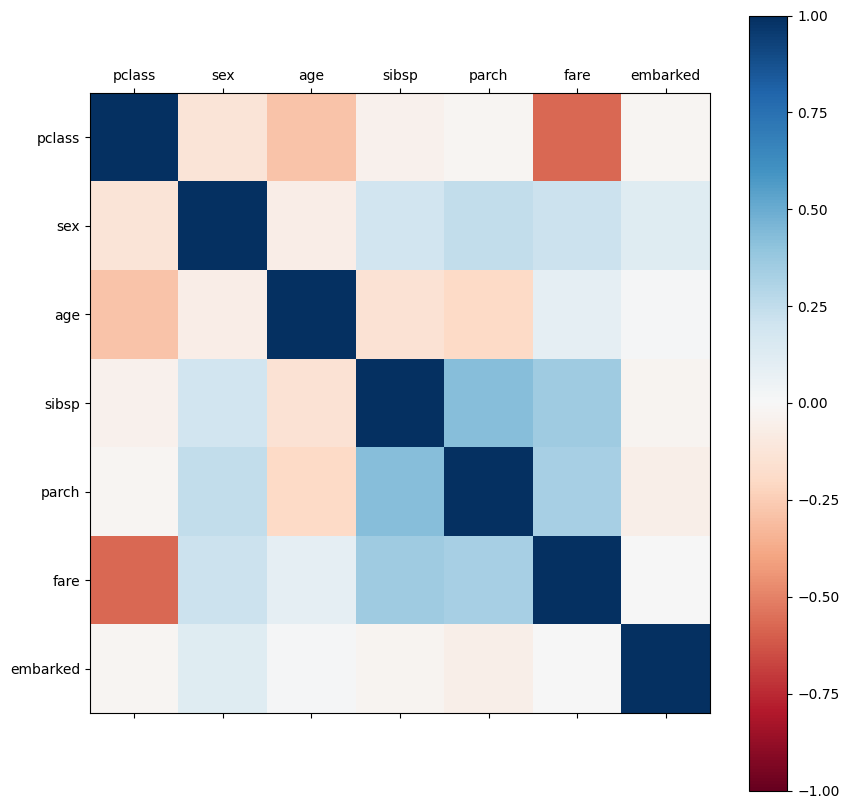

In [125]:
# create correlation matrix
corr = df.corr(method='kendall')

fig = plt.figure(figsize=(10,10))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)),corr.columns)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.colorbar()
plt.clim(-1,1)


# plt.title('Distribution of passangers by class')
# plt.xticks(pclass_count.index)
# plt.bar(pclass_count.index, pclass_count.values)
# plt.show()

# plt.title('Distribution of passangers by sex')
# sex_count = df['sex'].value_counts()
# plt.bar(sex_count.index, sex_count.values)
# plt.show()

<Axes: xlabel='pclass', ylabel='fare'>

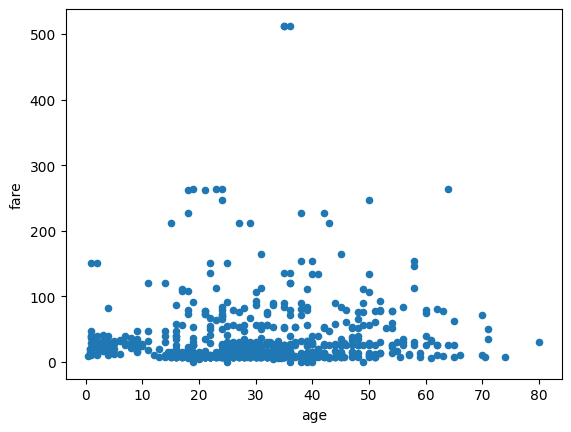

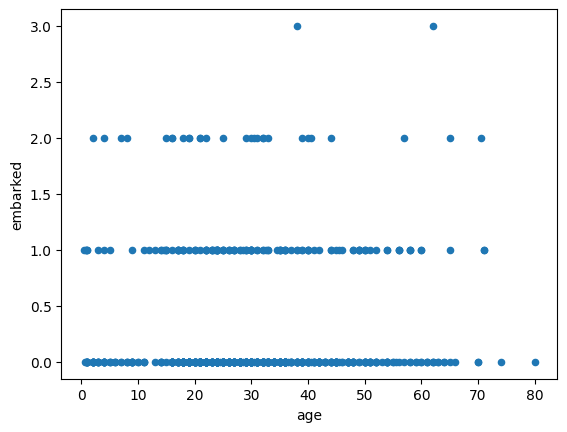

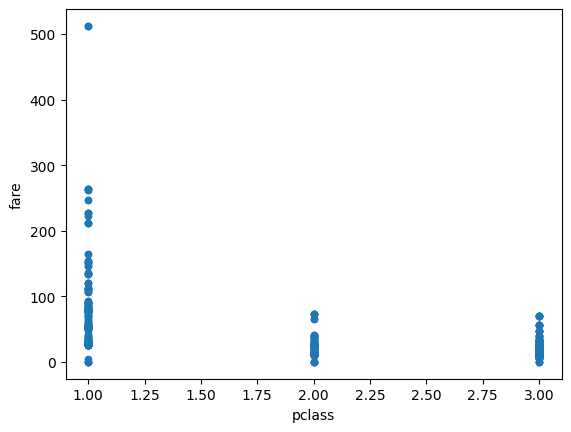

In [126]:
df.plot(kind='scatter', x='age',y='fare')
df.plot(kind='scatter', x='age',y='embarked')
df.plot(kind='scatter', x='pclass',y='fare')



pclass       3.0
sex          1.0
age         38.0
sibsp        1.0
parch        0.0
fare        31.0
embarked     1.0
Name: 0.75, dtype: float64
pclass       2.0000
sex          0.0000
age         20.1250
sibsp        0.0000
parch        0.0000
fare         7.9104
embarked     0.0000
Name: 0.25, dtype: float64
     pclass   sex    age  sibsp  parch   fare  embarked
0      True  True   True   True   True   True      True
1      True  True   True   True   True  False      True
2      True  True   True   True   True   True      True
3      True  True   True   True   True   True      True
4      True  True   True   True   True   True      True
..      ...   ...    ...    ...    ...    ...       ...
886    True  True   True   True   True   True      True
887    True  True   True   True   True   True      True
888    True  True  False   True  False   True      True
889    True  True   True   True   True   True      True
890    True  True   True   True   True   True      True

[891 rows x 7 

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0
887,1,1,19.0,0,0,30.0000,0
888,3,1,NaN,1,2,23.4500,0
889,1,0,26.0,0,0,30.0000,1


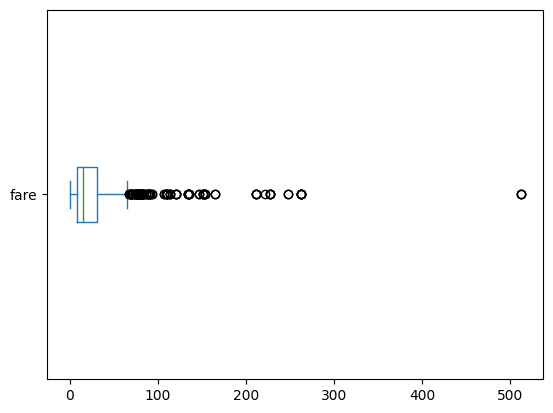

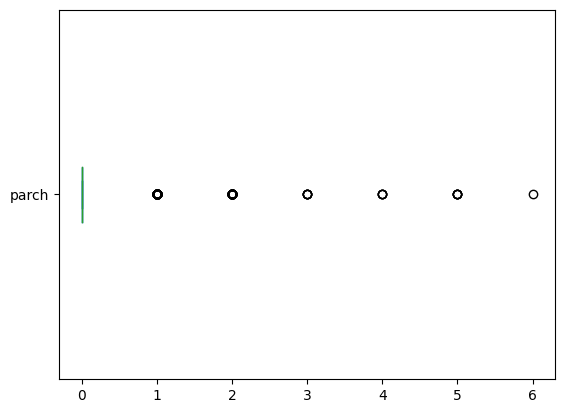

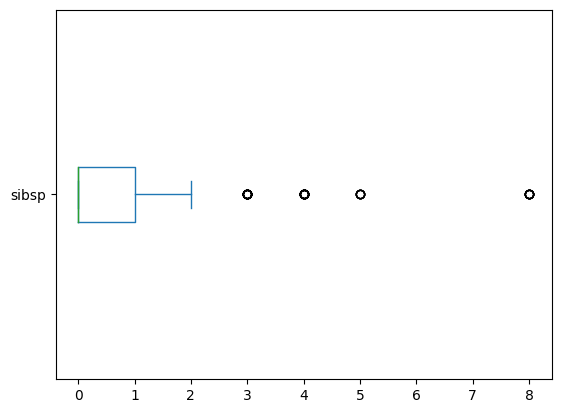

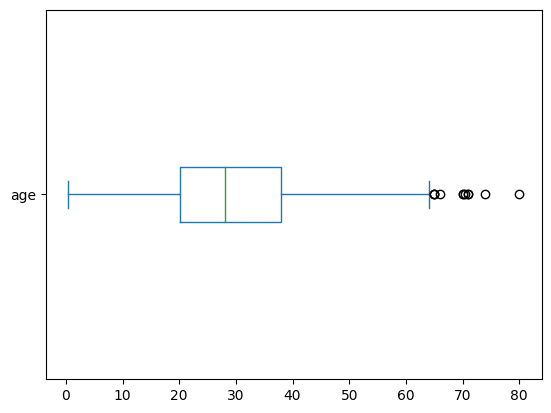

In [128]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
print(q3)
print(q1)
IQR = q3-q1
lower_bound = q1-1.5*IQR
upper_bound = q3+1.5*IQR
filter = ((df >= lower_bound) & (df <= upper_bound))
print(filter)
# columns_to_plot = 
# df[['fare', 'parch', 'sibsp', 'age']].plot(kind='box', vert=False)
df[['fare']].plot(kind='box', vert=False)
df[['parch']].plot(kind='box', vert=False)
df[['sibsp']].plot(kind='box', vert=False)
df[['age']].plot(kind='box', vert=False)
display(df)